In [ ]:
%matplotlib inline

==========================
MS, 20191003

Input: 
  - Data: SO/RHO_top800 (lon,lat,year) [from 3_calc-top800+plot] 
  
Output: 
  -Data&plots: 2D SO/RHO_top800_atlzm (lat,year) 



In [1]:
basedir='/home/rms101/SCRIPTS/amoc_stab/'
import sys
sys.path.append(basedir + 'MODS')

import os
import cmipdata as cd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt # for basic plotting
import rms_plots as rpl
import rms_utils as rut
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

################settings
#rundir='/HOME/rms/SCRIPTS/6_OTHER/6PARIS-STAB/4SO/';os.chdir(rundir)
#mpl.style.reload_library()
#plt.style.use('rms_paper')

registering cmaps
registering cmaps


1a. Calculate GM annual mean TAS timeseries LE
#####################################################

In [9]:
rundir='/home/rms101/SCRIPTS/amoc_stab/FIG4_SO+RHO/';os.chdir(rundir)
srcdir_base='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/DATA/' 
do_calc=True
var='so'
datadir=srcdir_base+'/amoc_stab_post'


if do_calc:
    os.chdir('{}/DATA_so'.format(datadir))

    # make ensemble of top 800m (lon,lat,year) timeseries [lon,lat,year] 
    # (created in 2_calc+plot_clim.py)
    ens_pic_top8=cd.mkensemble('top8_am_*_piControl*',prefix='top8_am_')
    ens_his_top8=cd.mkensemble('top8_am_*_historical-r*',prefix='top8_am_')
    ens_15c_top8=cd.mkensemble('top8_am_*_lowwarming15*',prefix='top8_am_')
    ens_20c_top8=cd.mkensemble('top8_am_*_lowwarming20*',prefix='top8_am_')
    ens_30c_top8=cd.mkensemble('top8_am_*_lowwarming30*',prefix='top8_am_')    

    # zonal mean Atlantic [lat,year]
    my_cdo_str='cdo -zonmean -ifthen '+rundir+'/atlantic_mask.nc {infile} {outfile}'
    ens_pic_top8_atlzm=cd.my_operator(ens_pic_top8, my_cdo_str, output_prefix='atlzm_',delete=False) #lon,lat,year
    ens_his_top8_atlzm=cd.my_operator(ens_his_top8, my_cdo_str, output_prefix='atlzm_',delete=False) #lon,lat,year
    ens_15c_top8_atlzm=cd.my_operator(ens_15c_top8, my_cdo_str, output_prefix='atlzm_',delete=False) #lon,lat,year
    ens_20c_top8_atlzm=cd.my_operator(ens_20c_top8, my_cdo_str, output_prefix='atlzm_',delete=False) #lon,lat,year
    ens_30c_top8_atlzm=cd.my_operator(ens_30c_top8, my_cdo_str, output_prefix='atlzm_',delete=False) #lon,lat,year
 
else:
    os.chdir('{}/DATA_so'.format(datadir))

    ens_pic_top8_atlzm=cd.mkensemble('atlzm_top8_am_*_piControl*',prefix='atlzm_top8_am_')
    ens_his_top8_atlzm=cd.mkensemble('atlzm_top8_am_*_historical-r*',prefix='atlzm_top8_am_')
    ens_15c_top8_atlzm=cd.mkensemble('atlzm_top8_am_*_lowwarming15*',prefix='atlzm_top8_am_')
    ens_20c_top8_atlzm=cd.mkensemble('atlzm_top8_am_*_lowwarming20*',prefix='atlzm_top8_am_')
    ens_30c_top8_atlzm=cd.mkensemble('atlzm_top8_am_*_lowwarming30*',prefix='atlzm_top8_am_')   

datadict_pic_atlzm = cd.loadfiles(ens_pic_top8_atlzm,var)
datadict_his_atlzm = cd.loadfiles(ens_his_top8_atlzm,var)
datadict_15c_atlzm = cd.loadfiles(ens_15c_top8_atlzm,var)
datadict_20c_atlzm = cd.loadfiles(ens_20c_top8_atlzm,var)
datadict_30c_atlzm = cd.loadfiles(ens_30c_top8_atlzm,var)

x_pic_atlzm=datadict_pic_atlzm['data'].squeeze(); 
x_his_atlzm=datadict_his_atlzm['data'].squeeze(); 
x_15c_atlzm=datadict_15c_atlzm['data'].squeeze(); 
x_20c_atlzm=datadict_20c_atlzm['data'].squeeze(); 
x_30c_atlzm=datadict_30c_atlzm['data'].squeeze(); 

#dims
lat=datadict_his_atlzm['dimensions']['lat'];  nlat=lat.size
os.chdir(rundir)


#AMOC
#amocdir='/HOME/rms/SCRIPTS/6_OTHER/6PARIS-STAB/1TS/AMOC/OLD/DATA_AMOC_LONG'

#ens_his_amoc=cd.mkensemble('{}/amoc_nh_am_*_historical-r1_r[1-5]i*'.format(amocdir),prefix='{}/amoc_nh_am_'.format(amocdir))
#ens_15c_amoc=cd.mkensemble('{}/amoc_nh_am_*_lowwarming15*'.format(amocdir),prefix='{}/amoc_nh_am_'.format(amocdir))
#ens_20c_amoc=cd.mkensemble('{}/amoc_nh_am_*_lowwarming20*'.format(amocdir),prefix='{}/amoc_nh_am_'.format(amocdir))
#ens_30c_amoc=cd.mkensemble('{}/amoc_nh_am_*_lowwarming30*'.format(amocdir),prefix='{}/amoc_nh_am_'.format(amocdir))

#datadict_his = cd.loadfiles(ens_his_amoc,'msftmyz')
#datadict_15c = cd.loadfiles(ens_15c_amoc,'msftmyz')
#datadict_20c = cd.loadfiles(ens_20c_amoc,'msftmyz')
#datadict_30c = cd.loadfiles(ens_30c_amoc,'msftmyza')

#amoc_his=np.mean(datadict_his['data'],axis=0)
#amoc_15c=np.mean(datadict_15c['data'],axis=0)
#amoc_20c=np.mean(datadict_20c['data'],axis=0)
#amoc_30c=np.mean(datadict_30c['data'],axis=0)

This ensemble contains:
1 variables
1 models
1 experiments
1 realizations
1 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 



In [6]:
years_his=np.arange(1950,2100+1);nyear_his=len(years_his)
years_15c=np.arange(2021,2600+1);nyear_15c=len(years_15c)
years_20c=np.arange(2036,2600+1);nyear_20c=len(years_20c)
years_30c=np.arange(2061,2600+1);nyear_30c=len(years_30c)

x_piclim_atlzm=np.mean(x_pic_atlzm,axis=0) #lat,piclim
x_his_atlzm_r=np.mean(x_his_atlzm,axis=0)-np.tile(x_piclim_atlzm,(nyear_his,1)) 
x_15c_atlzm_r=np.mean(x_15c_atlzm,axis=0)-np.tile(x_piclim_atlzm,(nyear_15c,1)) 
x_20c_atlzm_r=np.mean(x_20c_atlzm,axis=0)-np.tile(x_piclim_atlzm,(nyear_20c,1)) 
x_30c_atlzm_r=np.mean(x_30c_atlzm,axis=0)-np.tile(x_piclim_atlzm,(nyear_30c,1)) 

years_his_pre15c=np.arange(1950,2020+1)
years_his_pre20c=np.arange(1950,2035+1)
years_his_pre30c=np.arange(1950,2060+1)
x_his_atlzm_r_pre15c=x_his_atlzm_r[0:rut.find_nearest(years_his,2020+1),:]
x_his_atlzm_r_pre20c=x_his_atlzm_r[0:rut.find_nearest(years_his,2035+1),:]
x_his_atlzm_r_pre30c=x_his_atlzm_r[0:rut.find_nearest(years_his,2060+1),:]

#amoc_his_pre15c=amoc_his[0:rut.find_nearest(years_his,2020+1)]
#amoc_his_pre20c=amoc_his[0:rut.find_nearest(years_his,2035+1)]
#amoc_his_pre30c=amoc_his[0:rut.find_nearest(years_his,2060+1)]

3. Plot 1a: 2D Hofmoller plots of SO/rho0 (time,lat)###########
################################################################

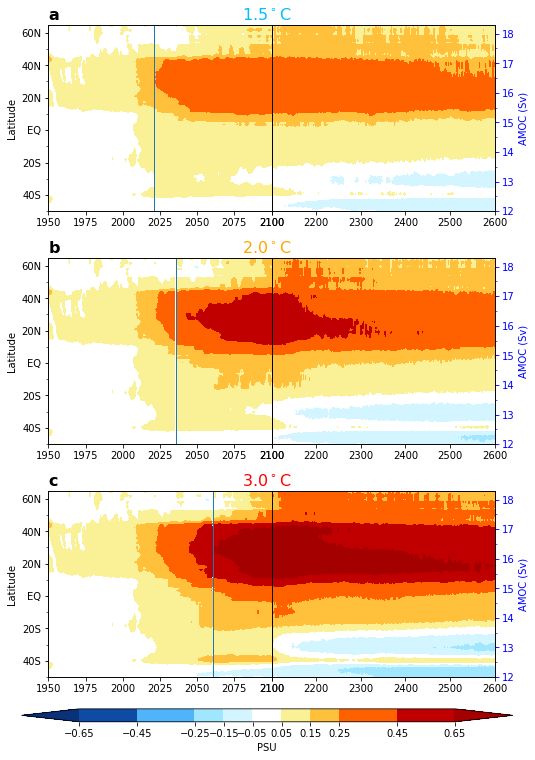

In [10]:




#Open figure##################################################
ncol=2; nrow=3
fig2, axs = plt.subplots(nrow,ncol, figsize=(ncol*4,nrow*4)); 
plt.subplots_adjust(hspace=0.25,wspace=0)

#Plot settings##################################################
latmin=-50;latmax=65
if var=='so': 
  clevs=np.array([-0.65,-0.45,-0.25,-0.15,-0.05,0.05,0.15,0.25,0.45,0.65])
  units='PSU'
  varnamelong='Salinity'
if var=='rho0': 
  clevs=0.5*np.array([-0.75,-0.55,-0.35,-0.15,-0.05,0.05,0.15,0.35,0.55,0.75])
  units='kg/m$^3$'
  varnamelong='Density'
cfparams=dict(clevs=clevs,plot_co=False,latlon=False)
colamoc='blue'
##########Column 1: 1950-2100
def ma1(ax):
  ax.set_ylim(latmin,latmax)
  ax.set_xlim(1950,2100)
  ax.yaxis.set_major_locator(MultipleLocator(20))
  ax.yaxis.set_minor_locator(MultipleLocator(10))    
  ax.yaxis.set_ticks_position('left')  
  ax.set_yticks(np.arange(-40,80,20))
  ax.set_yticklabels(('40S','20S','EQ', '20N', '40N', '60N','80N'))

  ax.set_ylabel('Latitude')

  ax2 = ax.twinx()
  ax2.set_ylim([12, 18.3])
  ax2.set_yticklabels((''))
  ax2.yaxis.set_tick_params(length=0,width=0)
  return ax2

####1.5
ax=axs[0,0];ax2=ma1(ax); 
ax.text(2080,latmax+3,'1.5$^\circ$C',color= 'deepskyblue',fontsize=16)
ax.text(1950,latmax+3,'a',fontsize=16,fontweight='bold')
#so/rho
cf=rpl.add_cf(ax,years_his_pre15c,lat,np.transpose(x_his_atlzm_r_pre15c),**cfparams)
ax.axvline(x=2021,linewidth=1)
cf=rpl.add_cf(ax,years_15c,lat,np.transpose(x_15c_atlzm_r),**cfparams)

#amoc
#ax2.plot(years_his_pre15c,amoc_his_pre15c,linewidth=0.75,color=colamoc)
#ax2.plot(years_15c,amoc_15c,linewidth=0.75,color=colamoc)

####2.0
ax=axs[1,0]; ax2=ma1(ax); 
ax.text(1950,latmax+3,'b',fontsize=16,fontweight='bold')
ax.text(2080,latmax+3,'2.0$^\circ$C',color= 'orange',fontsize=16)
#so/rho
cf=rpl.add_cf(ax,years_his_pre20c,lat,np.transpose(x_his_atlzm_r_pre20c),**cfparams)
ax.axvline(x=2036,linewidth=1)
cf=rpl.add_cf(ax,years_20c,lat,np.transpose(x_20c_atlzm_r),**cfparams)
#amoc
#ax2.plot(years_his_pre20c,amoc_his_pre20c,linewidth=0.75,color=colamoc)
#ax2.plot(years_20c,amoc_20c,linewidth=0.75,color=colamoc)


####3.0
ax=axs[2,0]; ax2=ma1(ax); 
ax.text(1950,latmax+3,'c',fontsize=16,fontweight='bold')
ax.text(2080,latmax+3,'3.0$^\circ$C',color= 'red',fontsize=16)
#so/rho
cf=rpl.add_cf(ax,years_his_pre30c,lat,np.transpose(x_his_atlzm_r_pre30c),**cfparams)
ax.axvline(x=2061,linewidth=1)
cf=rpl.add_cf(ax,years_30c,lat,np.transpose(x_30c_atlzm_r),**cfparams)
#amoc
#ax2.plot(years_his_pre30c,amoc_his_pre30c,linewidth=0.75,color=colamoc)
#ax2.plot(years_30c,amoc_30c,linewidth=0.75,color=colamoc)

##########Column 2: 2100-2600
def ma2(ax):
  ax.set_xlim(2100,2600)
  ax.set_xticks=np.arange(2200,2700,100)  
  ax.set_ylim(latmin,latmax)
  ax.set_yticklabels((''))
  ax.yaxis.set_tick_params(length=0,width=0)

  ax2 = ax.twinx()
  ax2.yaxis.set_major_locator(MultipleLocator(1.0))
  ax2.yaxis.set_minor_locator(MultipleLocator(0.5))
  ax2.yaxis.set_ticks_position('right')
  ax2.set_ylim([12, 18.3])
  ax2.set_ylabel('AMOC (Sv)',color=colamoc)
  ax2.tick_params('y', which='both',colors=colamoc)

  return ax2

####1.5
ax=axs[0,1]; ax2=ma2(ax);
#so/rho
cf=rpl.add_cf(ax,years_15c,lat,np.transpose(x_15c_atlzm_r),**cfparams)
#amoc
#ax2.plot(years_15c,amoc_15c,linewidth=0.5,color='blue')

####2.0
ax=axs[1,1];ax2=ma2(ax)
#so/rho
cf=rpl.add_cf(ax,years_20c,lat,np.transpose(x_20c_atlzm_r),**cfparams)
#amoc
#ax2.plot(years_20c,amoc_20c,linewidth=0.5,color=colamoc)

####3.0
ax=axs[2,1]; ax2=ma2(ax)
#so/rho
cf=rpl.add_cf(ax,years_30c,lat,np.transpose(x_30c_atlzm_r),**cfparams)
#amoc
#ax2.plot(years_30c,amoc_30c,linewidth=0.5,color=colamoc)

##########cbar and save
rpl.add_cb(ax,cf,lscale=2.2,x0scale=-0.2,y0scale=-3,orientation='horizontal',units=units)
rpl.mysavefig(fig2,'PLOTS/{}_atlzm_top800_ts.png'.format(var))

